# Angular Motion of Rigid Body
How to propagate the angular velocity of a rigid body?

In [10]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

## Equations of Motion
Starting with the conservation of angular momentum $\mathbf{H} = \mathbf{I} \cdot \boldsymbol{\omega}$, one can use the Coreolis Theorem to express:
\begin{align}
^W \frac{d}{dt} \mathbf{H} &= ^W\frac{d}{dt}\left(\mathbf{I} \cdot \boldsymbol{\omega}\right) \\
 &= ^B\frac{d}{dt}\left(\mathbf{I} \cdot \boldsymbol{\omega}\right) + \boldsymbol{\omega} \times \mathbf{H} \\
^W \frac{d}{dt} \mathbf{H} &= \mathbf{I} \cdot \boldsymbol{\omega} + \boldsymbol{\omega} \times ^B\mathbf{H} = \mathbf{M} \\
\end{align}

In [11]:
def propagateOmega(omega,I,dt):
    '''
    input: omega, 3x1 np.matrix, current ang rate
               I, 3x3 np.matrix, inertia matrix
              dt, float, delta time
    '''
    omega_new      = np.zeros([3,1])
    omega_new[0,0] = omega[0,0] + ((I[1,1] - I[2,2])/I[0,0])*omega[1,0]*omega[2,0] * dt
    omega_new[1,0] = omega[1,0] + ((I[2,2] - I[0,0])/I[1,1])*omega[2,0]*omega[0,0] * dt
    omega_new[2,0] = omega[1,0] + ((I[0,0] - I[1,1])/I[2,2])*omega[0,0]*omega[1,0] * dt
    return omega_new

In [12]:
def plotOmegaHistory(time,omega_hist):
    plt.subplot(311)
    plt.plot(time,omega_hist[0,:-1].T)
    plt.subplot(312)
    plt.plot(time,omega_hist[1,:-1].T)
    plt.subplot(313)
    plt.plot(time,omega_hist[2,:-1].T)
    

In [13]:
# initial conditions:
omega_0 = np.matrix([[1, 0.1, 0.1]]).T
omega_hist = omega_0

# time span
resolution = 0.05 # timestep in [s]
final_time = 10   # [s]
time = np.linspace(0,final_time,int(final_time/resolution))

# rigid body specs:
I = np.diag([1,2,3])

In [14]:
for i,t in enumerate(time):
    print("{}: omega = \n{}\n".format(i, omega_0))
    omega_0 = propagateOmega(omega_0,I,time[1]) # time propagation
    omega_hist = np.append(omega_hist, omega_0, axis=1)

0: omega = 
[[1. ]
 [0.1]
 [0.1]]

1: omega = 
[[0.99949749]
 [0.10502513]
 [0.09832496]]

2: omega = 
[[0.99897856]
 [0.1099636 ]
 [0.10326679]]

3: omega = 
[[0.99840793]
 [0.11514758]
 [0.10812354]]

4: omega = 
[[0.99778229]
 [0.12057227]
 [0.11322188]]

5: omega = 
[[0.99709629]
 [0.1262492 ]
 [0.11855712]]

6: omega = 
[[0.99634415]
 [0.13218954]
 [0.12414061]]

7: omega = 
[[0.99551952]
 [0.13840496]
 [0.12998341]]

8: omega = 
[[0.99461548]
 [0.14490752]
 [0.13609701]]

9: omega = 
[[0.99362445]
 [0.15170974]
 [0.14249333]]

10: omega = 
[[0.99253814]
 [0.15882456]
 [0.14918474]]

11: omega = 
[[0.99134747]
 [0.16626534]
 [0.15618403]]

12: omega = 
[[0.99004255]
 [0.17404588]
 [0.16350443]]

13: omega = 
[[0.98861254]
 [0.18218037]
 [0.17115956]]

14: omega = 
[[0.98704561]
 [0.19068341]
 [0.17916352]]

15: omega = 
[[0.98532885]
 [0.19956997]
 [0.18753076]]

16: omega = 
[[0.98344817]
 [0.20885537]
 [0.19627613]]

17: omega = 
[[0.9813882 ]
 [0.21855524]
 [0.20541486]]

18: o

<IPython.core.display.Javascript object>


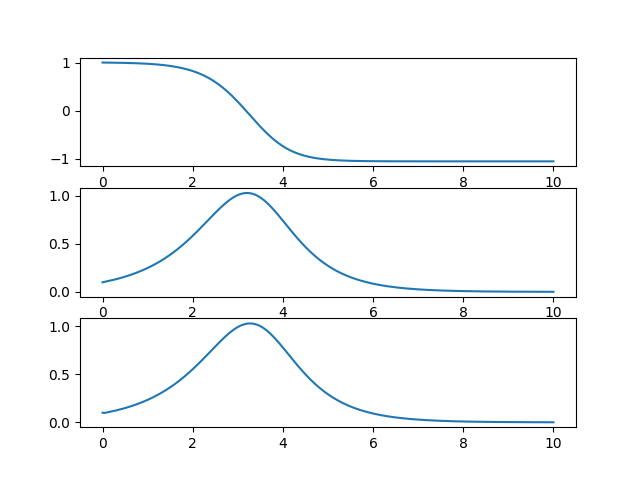

In [47]:
plotOmegaHistory(time,omega_hist)

<IPython.core.display.Javascript object>


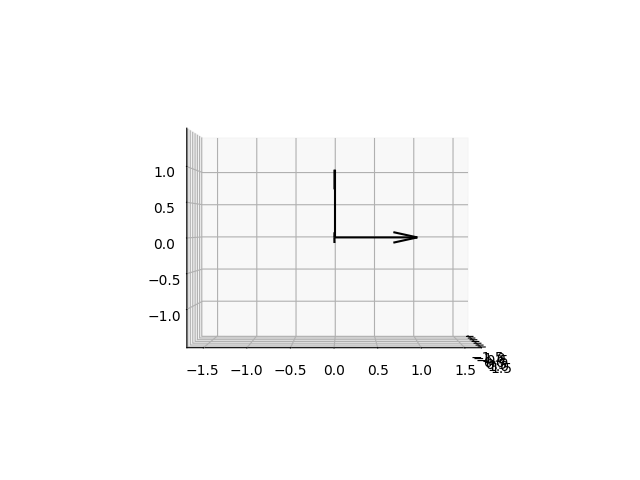

In [40]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# plt.quiver(*origin, [1,0,0], [0,1,0], [0,0,1], color=['r','b','g'])
addOrigin()

In [41]:
def addOrigin():
    """
    """
    origin = [0,0,0]
    plt.quiver(*origin, [1,0,0], [0,1,0], [0,0,1], color='k')
    
def addPose(pose):
    """
    """
    return 0
    
def addPose(t,q):
    """
    """
    return 0